<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc" style="margin-top: 1em;"><ul class="toc-item"><li><span><a href="#Python-Funktionen" data-toc-modified-id="Python-Funktionen-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Python Funktionen</a></span></li><li><span><a href="#Sympy-Funktionen" data-toc-modified-id="Sympy-Funktionen-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Sympy Funktionen</a></span></li><li><span><a href="#Numpy-Funktionen" data-toc-modified-id="Numpy-Funktionen-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Numpy Funktionen</a></span></li><li><span><a href="#Lamdifizierung-(sympy-->-numpy)" data-toc-modified-id="Lamdifizierung-(sympy-->-numpy)-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Lamdifizierung (sympy -&gt; numpy)</a></span></li><li><span><a href="#Ableitungen" data-toc-modified-id="Ableitungen-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Ableitungen</a></span></li><li><span><a href="#Integration---uneigentliche-Integrale" data-toc-modified-id="Integration---uneigentliche-Integrale-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Integration - uneigentliche Integrale</a></span></li><li><span><a href="#Bestimmte-Integrale" data-toc-modified-id="Bestimmte-Integrale-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Bestimmte Integrale</a></span></li></ul></div>

# Lektion 3

## Python Funktionen

In [1]:
pf = lambda x : x**2
pf(2)

4

In [2]:
def mysqr2(x):
    """ Berechnet das Quadrat von x"""
    y = x**2
    return y

In [3]:
mysqr2(2)

4

In [4]:
def mypow(x,n=2):
    """ Berechnet x**n und falls n nicht gegeben ist das Quadrat von x"""
    y = x**n
    return y

In [5]:
mypow(2), mypow(2,4)

(4, 16)

In [6]:
def f(a, L=[]):
    
    L.append(a)
    return L

#Der default Wert wird nur einmal ausgewertet und L ist hier ein veränderbares Objekt
print(f(1))
print(f(2))
print(f(3))
print(f(4,[2,3,1]))

[1]
[1, 2]
[1, 2, 3]
[2, 3, 1, 4]


In [7]:
def f(a, L=None):
    
    if L is None:
        L = []
    L.append(a)
    return L


print(f(1))
print(f(2))
print(f(3))
print(f(4,[2,3,1]))

[1]
[2]
[3]
[2, 3, 1, 4]


## Sympy Funktionen

In [8]:
from sympy import *
init_printing()
x,y,z = symbols('x y z')
f = Lambda(x,x**2) # vgl. lambda x : expr

In [9]:
f(2)

In [10]:
f = Lambda((x,y,z),x*y+y-2*z**2)
f

In [11]:
f(1,2,3)

In [12]:
param = x,y,z
f = Lambda(param,x+y-z)
f(*param) # * ist hier der "argument unpacking operator"

In [13]:
f = Function('f')
g = Function('g')
h = Function('h')

In [14]:
f(g(x))

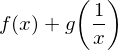

In [15]:
f(x)+g(1/x)

## Numpy Funktionen

In [16]:
import numpy as np

In [17]:
xn = np.linspace(0,1,4)
xn

array([0.        , 0.33333333, 0.66666667, 1.        ])

In [18]:
np.sin(xn)

array([0.        , 0.3271947 , 0.6183698 , 0.84147098])

In [19]:
np.sin(np.pi*xn)

array([0.00000000e+00, 8.66025404e-01, 8.66025404e-01, 1.22464680e-16])

## Lamdifizierung (sympy -> numpy)

In [20]:
f = x**2 * sin(x)
f

In [21]:
fn = lambdify(x,f)

In [22]:
xn = np.linspace(0,11,5)
fn(xn)

array([   0.        ,    2.88631125,  -21.34259485,   62.79474906,
       -120.99881499])

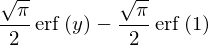

In [23]:
f = Integral(exp(-x**2),(x,1,y))
ff = f.doit()
ff

In [24]:
from scipy import special
special.erf(1)

In [25]:
fn = lambdify(y,f.doit(),modules=("numpy",{"erf":special.erf}))

In [26]:
f.subs(y,2).evalf()

In [27]:
fn(xn)

array([-0.74682413,  0.13931362,  0.13940279,  0.13940279,  0.13940279])

In [28]:
fn(2)

## Ableitungen

In [29]:
x = symbols('x'); n = symbols('n')
f = x**n
f

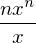

In [30]:
f.diff(x)

In [31]:
n.assumptions0

{'commutative': True}

In [32]:
f.diff(x).powsimp()

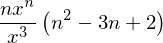

In [33]:
f.diff(x,3)

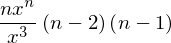

In [34]:
f.diff(x,3).factor()

In [35]:
f.diff(x,0) # f.diff()

In [36]:
g = (1-cos(x))/x

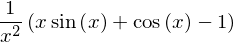

In [37]:
g.diff().simplify()

In [38]:
f = Function('f')
g = Function('g')
h = Function('h')

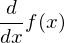

In [39]:
diff(f(x),x)

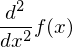

In [40]:
f(x).diff(x,2)

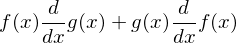

In [41]:
diff(f(x)*g(x),x)

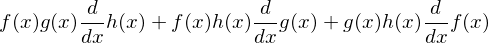

In [42]:
diff(f(x)*g(x)*h(x),x)

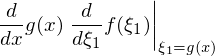

In [43]:
diff(f(g(x)))

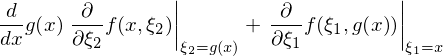

In [44]:
diff(f(x,g(x)),x)

## Integration - uneigentliche Integrale

In [45]:
f = x**n

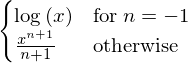

In [46]:
f.integrate(x)

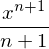

In [47]:
f.integrate(x,conds='none')

In [48]:
h = sin(x)*cos(x)
h

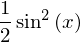

In [49]:
Ih = h.integrate()
Ih

In [50]:
Eq(Ih.diff(x),h) # equal 

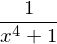

In [51]:
f = 1/(1+x**4)
f

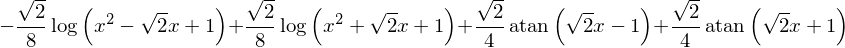

In [52]:
If = f.integrate()
If

In [53]:
If.diff(x) == f # equal

False

In [54]:
If.diff(x).simplify() == f # geht doch

True

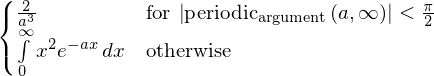

In [55]:
a = Symbol('a')
Ig = Integral(x**2*exp(-a*x), (x,0,oo))
Ig.doit()

In [56]:
a = Symbol('a',positive=True)

In [57]:
Ig2 = Integral(x**2*exp(-a*x), (x,0,oo))
Ig2.doit()

## Bestimmte Integrale

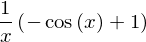

In [70]:
g = (1-cos(x))/x
g.simplify()

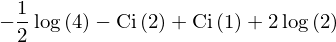

In [71]:
g.integrate((x,1,2))

In [60]:
from sympy import * 
x = symbols('x')
init_printing()
h = sqrt(exp(-x**2)+2)
h

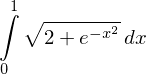

In [61]:
Ih = Integral(h,(x,0,1))
Ih

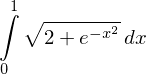

In [62]:
Ih.doit()

In [63]:
Ih.n() # numerische Integration

In [64]:
# Comp LA / Numerik I Stoff (nicht relevant für Comp Ana)
import numpy as np
from scipy import integrate

In [65]:
res, err = integrate.quad(lambdify(x,h),0,1)
res

In [66]:
f = Function('f')
y = symbols('y')

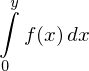

In [67]:
Integral(f(x),(x,0,y))